In [5]:
from utils import *
import numpy as np
import networkx as nx
from custom_envs import *
import matplotlib.pyplot as plt

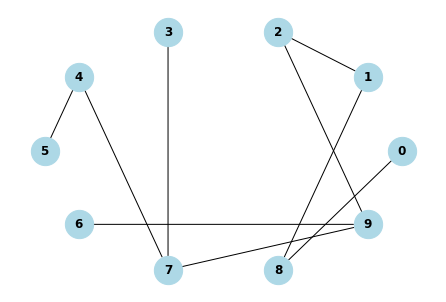

In [6]:
rng = np.random.default_rng(np.random.randint(0, 100))
tree = random_spanning_tree(10, rng)

# Create a graph from the adjacency matrix
#T = T.sum(1)
G = nx.from_numpy_array(tree)

# Draw the graph using NetworkX and Matplotlib
nx.draw_circular(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=800, arrows=True)
plt.show()

In [7]:
T = sample_transition_rules(10, 2, rng, mcmc=True)
is_strongly_connected(T.sum(1))

True

In [8]:
r = sample_reward_rules(10, 2, 1, rng)
r

[[3, -1, -1, 1.0, 1.0, -1]]

In [9]:
f = sample_flag_rules(10, 2, 1, rng)
f

[[8, -1, 1, 1]]

In [10]:
sample_reward_rules(1, 5, 5, rng, prob_use_action=1.0, prob_use_flag=0)


[[0, -1, 3, 1.0, 1.0, -1],
 [0, -1, 2, 1.0, 1.0, -1],
 [0, -1, 0, 1.0, 1.0, -1],
 [0, -1, 4, 1.0, 1.0, -1],
 [0, -1, 1, 1.0, 1.0, -1]]

In [11]:
sample_reward_rules(5, 1, 5, rng, prob_use_action=0.0, prob_use_flag=0)


[[1, -1, -1, 1.0, 1.0, -1],
 [0, -1, -1, 1.0, 1.0, -1],
 [4, -1, -1, 1.0, 1.0, -1],
 [3, -1, -1, 1.0, 1.0, -1],
 [2, -1, -1, 1.0, 1.0, -1]]

[[8, -1, -1, 1.0, 1.0, 1.0]]
[[7, -1, 1, 1.0, 1.0, 1.0]]


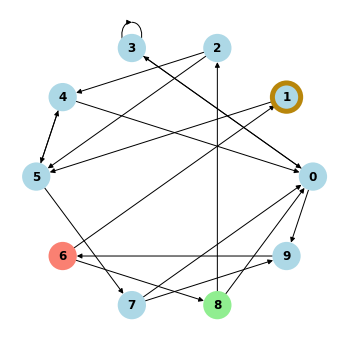

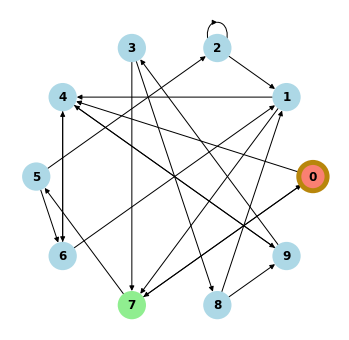

In [12]:
env = DarkKeyDoor(10, 2, 10)
print(env.reward_rules)
state, _ = env.reset()
image = env.render()
plt.imsave("test.png", image)

env = DarkKeyDoor(10, 2, 10)
print(env.reward_rules)
state, _ = env.reset()
image = env.render()
plt.imsave("test.png", image)

In [13]:
image.shape

(432, 432, 3)

In [14]:
env.transition[9, :]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [15]:
env.flag_rules

[[0, -1, -1, 1]]

In [16]:
env = DarkRoom(8, 2, 10)

In [17]:
env = DarkKeyDoor(10, 2, 10)
env.reward_rules

[[3, -1, -1, 1.0, 1.0, 1.0]]

In [18]:
env = DarkRoom(8, 2, 10)


In [19]:
obs, _ = env.reset()
obs

array([0., 0., 0., 0., 1., 0., 0., 0.])

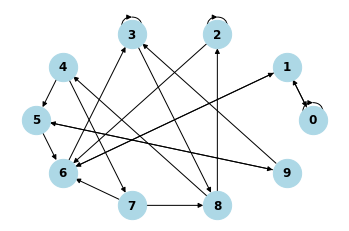

In [20]:
import io
from PIL import Image

T = sample_transition_rules(10, 2, rng)
adj_matrix = T.sum(1)
graph = nx.DiGraph(incoming_graph_data=adj_matrix)
"""
n_nodes = adj_matrix.shape[0]
for i in range(n_nodes):
    for j in range(n_nodes):
        if adj_matrix[i, j] > 0:
            graph.add_edge(i, j)
"""

im_io = io.BytesIO()
fig, ax = plt.subplots()
nx.draw_circular(graph, ax=ax, with_labels=True, node_color='lightblue', font_weight='bold', font_color="black", node_size=800)
plt.savefig(im_io, format="png")
im_io.seek(0)
im = Image.open(im_io)
im_io.close()


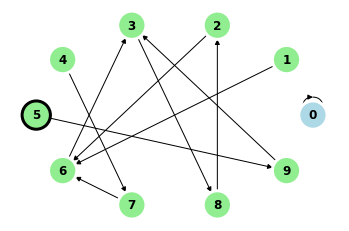

In [21]:
import io

adj_matrix = T[:, 0]
graph = nx.DiGraph(incoming_graph_data=adj_matrix)

color_map = ["lightblue"] + ["lightgreen" for i in range(9)]
fig, ax = plt.subplots()
font_colors = ["white" for i in range(10)]
font_colors[5] = "black"
nx.draw_circular(graph, ax=ax, with_labels=True, node_color=color_map, font_weight='bold', edgecolors=font_colors, linewidths=3.0, node_size=800)
fig.canvas.draw()
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
plt.imsave("test.png", data)

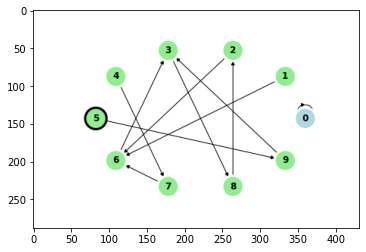

In [22]:
plt.imshow(data)

In [23]:
color_map

['lightblue',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen']

In [24]:
graph

In [25]:
len(graph)

10